Open XLS file

In [27]:
import pandas as pd
from datetime import datetime as dt
import os
import xlrd
import plotly

In [28]:
df = pd.DataFrame
filepath = os.getcwd()
filename = "data.xls"
df = pd.read_excel(os.path.join(filepath,filename),index_col=0)
df = df.reset_index()
df = df.replace("-", pd.NA)
df.fillna("nan",inplace=True)

In [29]:
df

,Name,Geburtsjahr,Todesjahr,Amtsantritt,Abtritt,Partei
0,Konrad Adenauer,1876,1967,1949-09-15,1963-10-16 00:00:00,CDU
1,Ludwig Erhard,1897,1977,1963-10-16,1966-12-01 00:00:00,CDU
2,Kurt Georg Kiesinger,1904,1988,1966-12-01,1969-10-21 00:00:00,CDU
3,Willy Brandt,1913,1992,1969-10-21,1974-04-07 00:00:00,SPD
4,Walter Scheel,1919,2016,1974-04-07,1974-04-16 00:00:00,FDP
5,Helmut Schmidt,1918,2015,1974-04-16,1982-10-01 00:00:00,SPD
6,Helmut Kohl,1930,2017,1982-10-01,1998-10-27 00:00:00,CDU
7,Gerhard Schröder,1944,nan,1998-10-27,2005-11-22 00:00:00,SPD
8,Angela Merkel,1954,nan,2005-11-22,2021-10-31 00:00:00,CDU
9,Olaf Scholz,1958,nan,2021-10-31,nan,SPD


Calculate age at start of chancellorship

In [30]:
format_1 = "%Y"

def dt1(x):
    if x["Geburtsjahr"] != "nan":
        return dt.strptime(str(x["Geburtsjahr"]), format_1)
def dt2(x):
    if x["Todesjahr"] != "nan":
        return dt.strptime(str(x["Todesjahr"]), format_1)

df["Amtsantritt"] = pd.to_datetime(df.Amtsantritt)
df["Abtritt"] = pd.to_datetime(df.Abtritt)
df["Geburtsjahr"] = df.apply(dt1, axis=1)
df["Todesjahr"] = df.apply(dt2, axis=1)

In [31]:
def f1(x):
    return int((x["Amtsantritt"] - x["Geburtsjahr"]).days/365.2425)

df["Antrittsalter"] = df.apply(f1, axis=1)

In [32]:
def f2(x):
    try:
        return int((x["Abtritt"] - x["Geburtsjahr"]).days/365.2425)
    except:
        return pd.NA
               
df["Abtrittsalter"] = df.apply(f2, axis=1)

In [33]:
# "Verjüngung" bei Regierungswechsel
# df['Change'] = (df.Abtrittsalter.shift(1) - df.Antrittsalter) if df.Abtrittsalter.shift(1) != "nan" else (51.926027 - df.Antrittsalter)
df['Change'] = (df.Abtrittsalter.shift(1) - df.Antrittsalter) 

In [34]:
df.at[10,"Change"] = int(67.876712 - 41.860274)
df.at[11,"Change"] = int(67.876712 - 60.871233)
df.at[12,"Change"] = int(67.876712 - 52.865753)
df.at[13,"Change"] = int(67.876712 - 54.868493)

Plot nice graphs

In [35]:
df["Amtszeit"] = df["Abtritt"] - df["Amtsantritt"]

In [36]:
def f5(x):
    try:
        return int((x.Amtszeit).days / 365.2425)
    except:
        return pd.NA

df["Amtszeit"] = df.apply(f5, axis=1)

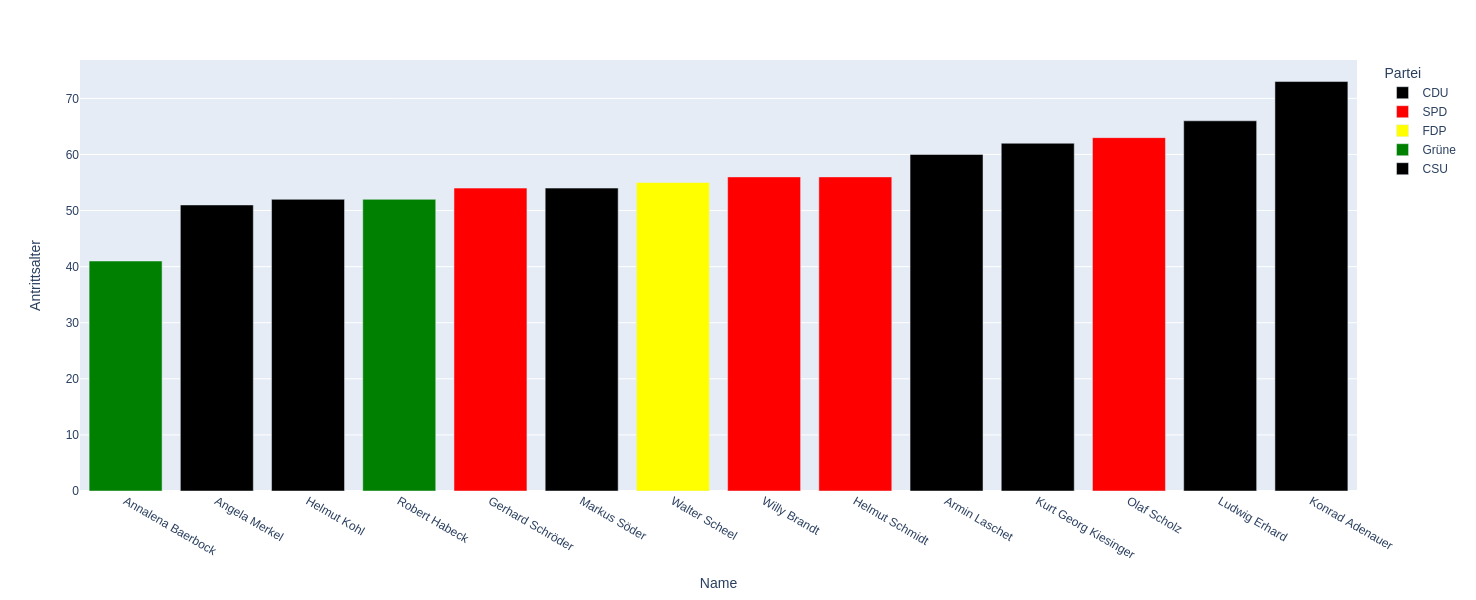

In [57]:
import plotly.express as px
fig = px.bar(df, x='Name', y='Antrittsalter',
             hover_data=['Name', 'Amtsantritt', "Abtritt"], color='Partei', height=600, width=800, color_discrete_map={
                "CDU":"black",
                "SPD": "red",
                "Grüne": "green",
                "FDP": "yellow",
                "CSU": "black"})
fig.update_layout(xaxis={'categoryorder':'total ascending'})
fig.show()

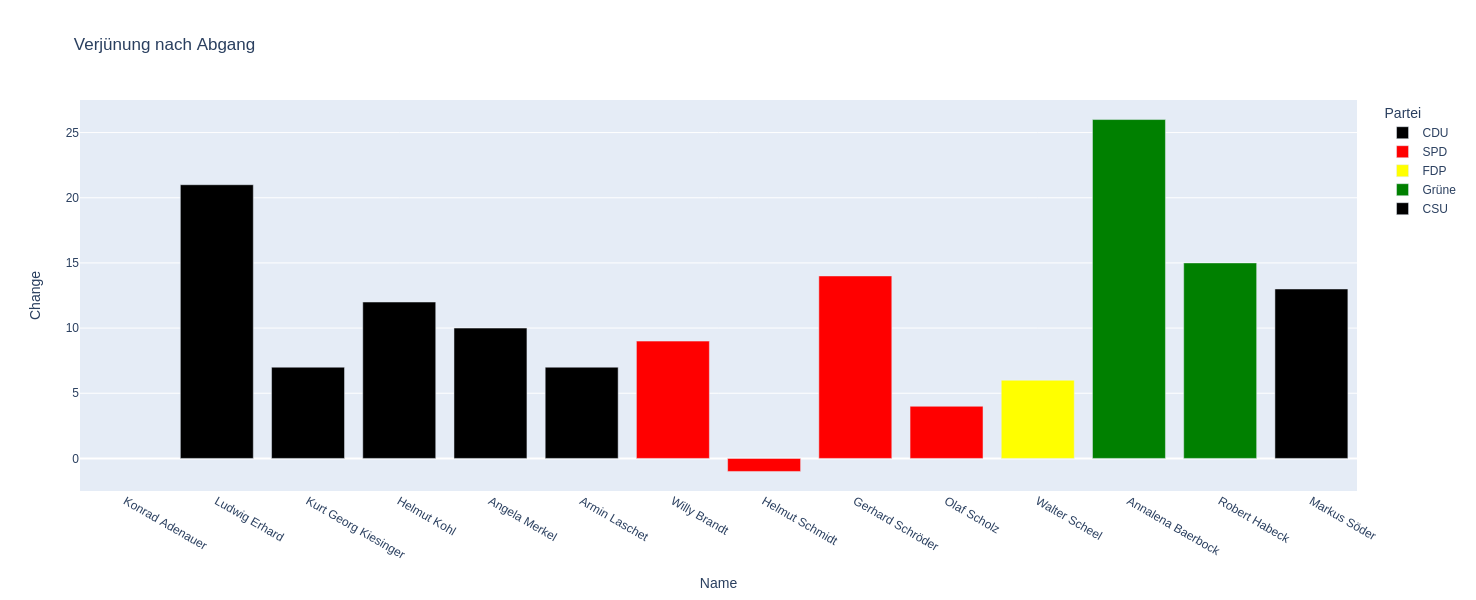

In [58]:
fig = px.bar(df, x='Name', y='Change',
             hover_data=['Name', 'Amtsantritt', "Abtritt"], color='Partei', height=600, width=800, color_discrete_map={
                "CDU":"black",
                "CSU": "black",
                "SPD": "red",
                "Grüne": "green",
                "FDP": "yellow",
                }, title="Verjünung nach Abgang")
#fig.update_layout(xaxis={'categoryorder':'total ascending'})
fig.show()